# Altair Visualization Example 1
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

### About this notebook

In this worksheet, we use a real dataset in the csv format to illustrate the use of the package `Altair` in visualization. Plots made with Altair can be visualized and manipulated interactively.

In order to install this package and to see a detailed description go to

https://altair-viz.github.io/

---

In [1]:
import numpy as np
import altair as alt
import pandas as pd


# This line enables the renderer of Altair in the notebook.
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

### Reading the dataset
Since the dataset is a .csv file, we use pandas to read the file and take a look to the first elements.

In [2]:
df = pd.read_csv("data.csv")  

In [3]:
df.head()

,Name,z,sigma*,e_sigma*,n_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM
0,SDSS J000805.62+145023.4,0.0454,140.0,27.0,NaN,7610.0,380.0,41.13,0.04,7.7,NaN,0.1
1,SDSS J004236.86-104921.8,0.0419,78.4,10.0,NaN,1960.0,97.0,41.58,0.14,6.7,NaN,0.1
2,SDSS J011703.58+000027.3,0.0456,98.8,16.0,NaN,2270.0,110.0,41.45,0.08,6.8,NaN,0.1
3,SDSS J020459.25-080816.0,0.0772,121.0,9.4,a,3720.0,180.0,41.13,0.05,7.0,NaN,0.1
4,SDSS J020615.99-001729.1,0.0426,216.0,30.0,NaN,3860.0,190.0,41.91,0.07,7.5,NaN,0.1


In [4]:
df.describe()

,z,sigma*,e_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM
count,88.000000,88.000000,88.000000,71.000000,71.000000,71.000000,71.000000,88.00000,15.000000,88.000000
mean,0.048665,117.142045,11.805682,3206.056338,210.760563,41.504225,0.078028,6.86625,0.140667,0.189886
std,0.032562,48.285108,5.308383,1759.679743,191.219953,0.663268,0.041700,0.72825,0.074303,0.172470
min,0.000947,30.000000,2.900000,810.000000,41.000000,40.100000,0.030000,4.90000,0.020000,0.020000
25%,0.027750,87.025000,7.750000,1905.000000,110.000000,41.155000,0.050000,6.30000,0.100000,0.100000
50%,0.042250,113.500000,12.000000,2970.000000,160.000000,41.510000,0.070000,7.00000,0.120000,0.100000
75%,0.062200,139.250000,15.000000,3870.000000,210.000000,41.860000,0.090000,7.40750,0.170000,0.200000
max,0.184000,268.000000,30.000000,8240.000000,1190.000000,43.610000,0.200000,8.52000,0.310000,1.060000


The dataframe includes data from 88 supermassive black holes. There can be seen the mean of the values, the standard deviation and the minimum and maximum values.

The columns correspond to

**z** : Redshift \
**sigma**\* : Stellar velocity dispersion \
**e_sigma**\* : Formal uncertainty in sigma* \
**FWHM** : H<sub>$\alpha$</sub> Full-Width at Half Maximum \
**e_FWHM** : Formal uncertainty in FWHM \
**logL** : $log_{10}$ of H<sub>$\alpha$</sub> luminosity in erg/s \
**e_logL** : Formal uncertainty in logL \
**logM** : $\log_{10}$ of the Black Hole mass \
**E_logM** : Formal (upper limit) uncertainty in logM \
**e_logM** : Formal (lower limit) uncertainty in logM 

---

### Ploting the Data

We will use the `Altair` package to plot the dataframe.

---

The first chart looks like this

In [5]:
alt.Chart(df).mark_point()

In this chart we see all the data in the dataframe as a point because we have not defined any axis yet. Therefore, we introduce one of the axis to distribute the data along that direction. For example, define the x-axis as the redshift, $z$.

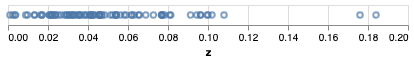

In [6]:
# put some data along the x axis
alt.Chart(df).mark_point().encode(
    x = 'z'
)

Instead of points to visualice the data, we can use ticks. 

See https://altair-viz.github.io/user_guide/marks.html

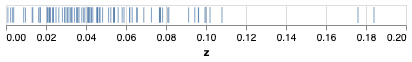

In [7]:
# make the chart clear by changing the mark from point to tick
alt.Chart(df).mark_tick().encode(
    x = 'z'
)

Now, we extend the vertical direction with other feature, for example $\log M$.

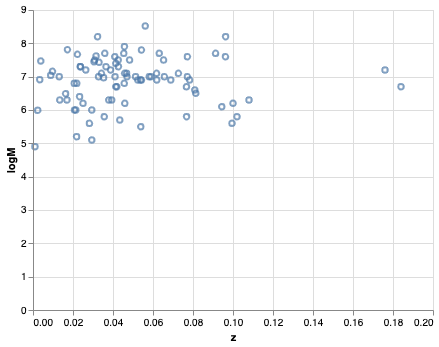

In [8]:
alt.Chart(df).mark_point().encode(
    x = 'z',
    y = 'logM'
)

Another way to designate the data in the axes is

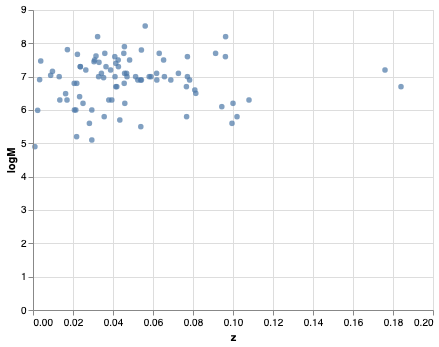

In [9]:
alt.Chart(df).mark_point(filled=True).encode(
    alt.X('z'),
    alt.Y('logM')
)

Using this way of designate the axis makes simple to change the scale.

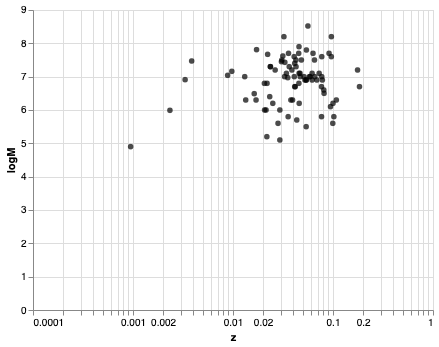

In [10]:
alt.Chart(df).mark_point(filled = True, color = 'black').encode(
    alt.X('z',scale=alt.Scale(type='log', base=10)),
    alt.Y('logM')
)

Now, lets try other characteristics.

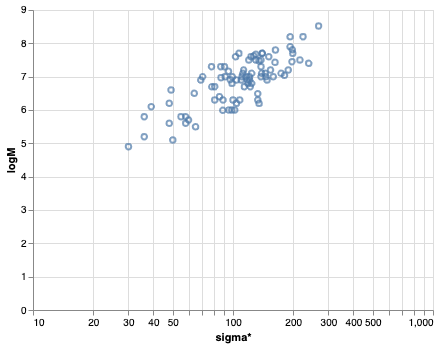

In [11]:
alt.Chart(df).mark_point().encode(
    alt.X('sigma*',scale=alt.Scale(type='log', base=10)),
    alt.Y('logM')
)

And now, we will add some color according to the values of another feature.

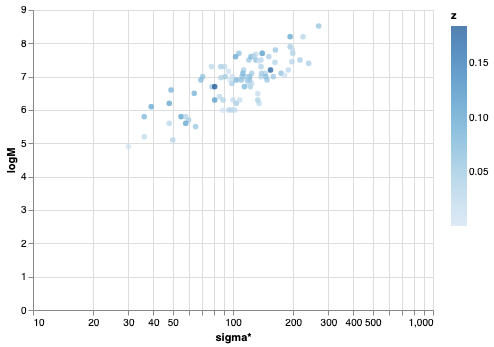

In [12]:
alt.Chart(df).mark_point(filled=True).encode(
    alt.X('sigma*', scale=alt.Scale(type='log', base=10)),
    alt.Y('logM'),
    color = 'z'
)

What about using the mass as the color of the point.

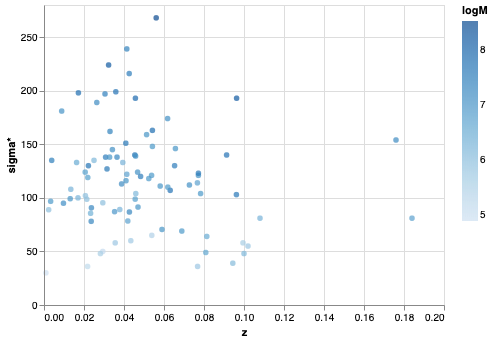

In [13]:
alt.Chart(df).mark_point(filled=True).encode(
    alt.X('z'),
    alt.Y('sigma*'),
    color = 'logM'
)

Or using the mass as the size of the point.

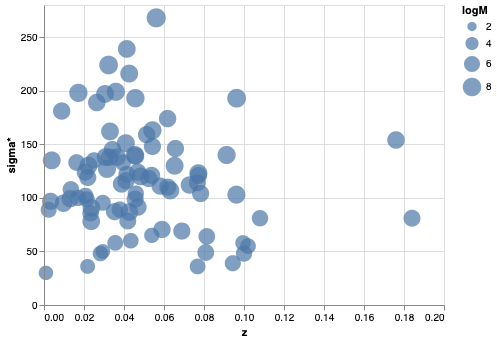

In [14]:
alt.Chart(df).mark_point(filled=True).encode(
    alt.X('z'),
    alt.Y('sigma*'),
    size = 'logM'
)

### Interactivity

Now the interesting part: interactivity. All the details can be found at

https://altair-viz.github.io/user_guide/interactions.html

and 

https://altair-viz.github.io/gallery/index.html#gallery-category-interactive-charts

We begin with the simple plot

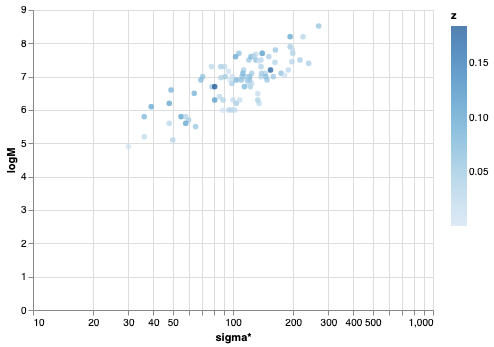

In [15]:
alt.Chart(df).mark_point(filled=True).encode(
    alt.X('sigma*', scale=alt.Scale(type='log', base=10)),
    alt.Y('logM'),
    color = 'z'
)

First add the `tooltip` property to show the Name tag when the cursor is over any point.

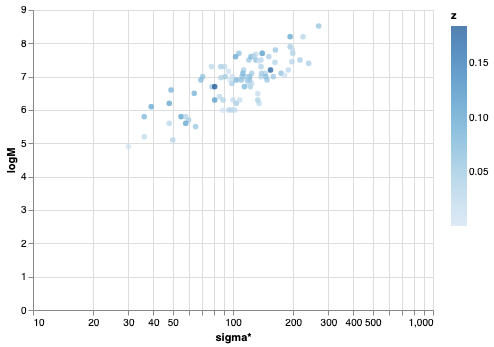

In [16]:
alt.Chart(df).mark_point(filled=True).encode(
    alt.X('sigma*', scale=alt.Scale(type='log', base=10)),
    alt.Y('logM'),
    color = 'z',
    tooltip = 'Name' 
)

and add the `selection` property:

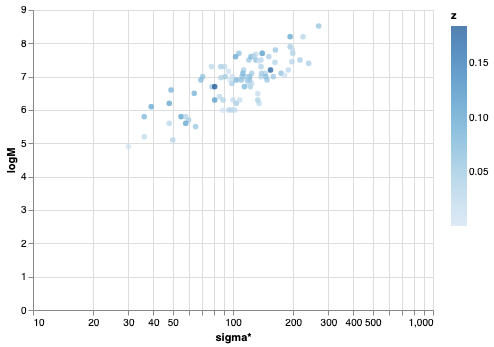

In [17]:
# create an interval selection
brush = alt.selection_interval()

alt.Chart(df).mark_point(filled=True).encode(
    alt.X('sigma*', scale=alt.Scale(type='log', base=10)),
    alt.Y('logM'),
    color = 'z',
    tooltip = 'Name' 
).add_selection(
    brush
)

Using the click of the mouse it is possible to make a selection. However, we have not defined waht to do with the selected points. Now, we will give color only to the selected points:

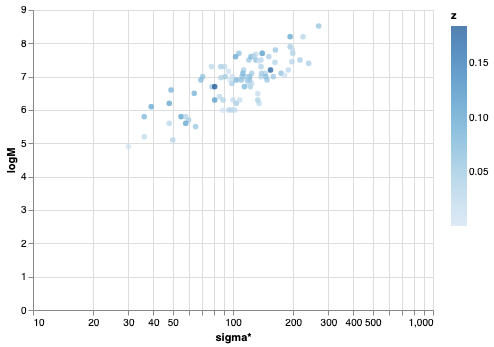

In [18]:
brush = alt.selection_interval()

alt.Chart(df).mark_point(filled=True).encode(
    alt.X('sigma*', scale=alt.Scale(type='log', base=10)),
    alt.Y('logM'),
    color = alt.condition(brush,'z', alt.value('lightgray')),
    tooltip = 'Name' 
).add_selection(
    brush
)

With just one modification, we change the selection tool:

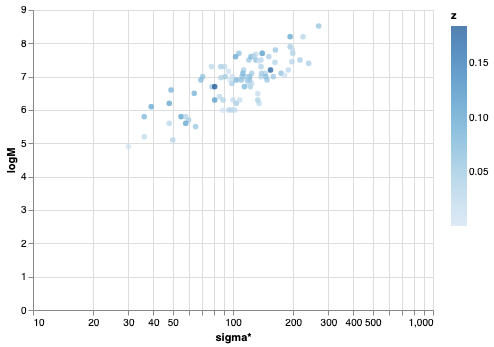

In [19]:
brush = alt.selection_interval(encodings=['x'])

alt.Chart(df).mark_point(filled=True).encode(
    alt.X('sigma*', scale=alt.Scale(type='log', base=10)),
    alt.Y('logM'),
    color = alt.condition(brush,'z', alt.value('lightgray')),
    tooltip = 'Name' 
).add_selection(
    brush
)

Changing the selection type we can move and scale the plot

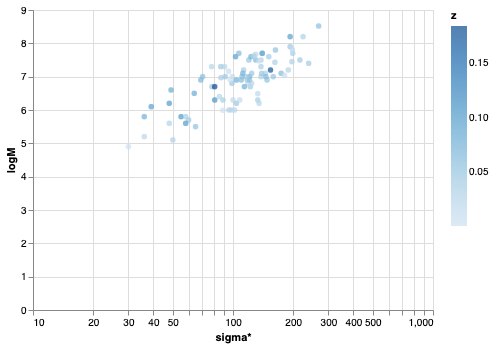

In [20]:
scales = alt.selection_interval(bind='scales')

alt.Chart(df).mark_point(filled=True).encode(
    alt.X('sigma*', scale=alt.Scale(type='log', base=10)),
    alt.Y('logM'),
    color = 'z',
    tooltip = 'Name' 
).add_selection(
    scales
)

Finally, we can create a slider to choose a cutoff value and give color to points based on whether they are smaller or larger than this value. 

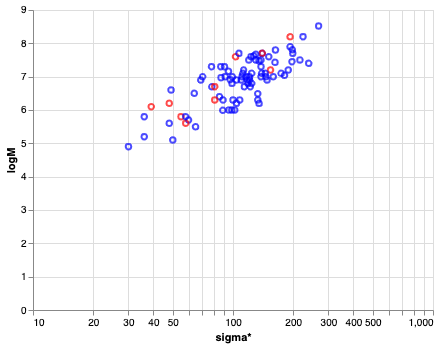

In [21]:
# Definition of the slider
slider = alt.binding_range(min=0, max=0.184, step=0.001, name='z cutoff:')
selector = alt.selection_single(name='SelectorName',fields=['cutoff'],
                               bind=slider, init={'cutoff':0.09})

alt.Chart(df).mark_point().encode(
    alt.X('sigma*', scale=alt.Scale(type='log', base=10)),
    alt.Y('logM'),
    tooltip = 'Name',
    color = alt.condition(
    alt.datum.z<selector.cutoff,
    alt.value('blue'),alt.value('red'))
).add_selection(
    selector
)